## LiB Capacity prediciotn using NASA data

The data is obtained from here : https://data.nasa.gov/dataset/Li-ion-Battery-Aging-Datasets/uj5r-zjdb/about_data

James

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv('discharge.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic statistics of the dataframe
print(df.describe())

# Display information about the dataframe
print(df.info())

   Voltage_measured  Current_measured  Temperature_measured  Current_charge  \
0          3.974871         -2.012528             24.389085          1.9982   
1          3.951717         -2.013979             24.544752          1.9982   
2          3.934352         -2.011144             24.731385          1.9982   
3          3.920058         -2.013007             24.909816          1.9982   
4          3.907904         -2.014400             25.105884          1.9982   

   Voltage_charge     Time  Capacity  id_cycle       type  \
0           3.062   35.703  1.856487         1  discharge   
1           3.030   53.781  1.856487         1  discharge   
2           3.011   71.922  1.856487         1  discharge   
3           2.991   90.094  1.856487         1  discharge   
4           2.977  108.281  1.856487         1  discharge   

   ambient_temperature    time Battery  
0                   24  2008.0   B0005  
1                   24  2008.0   B0005  
2                   24  2008.0   B0

In [3]:
df

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005
...,...,...,...,...,...,...,...,...,...,...,...,...
169761,2.835283,-2.011160,37.396003,1.9986,1.937,2392.437,1.341051,132,discharge,24,2008.0,B0018
169762,2.774711,-2.011370,37.544067,1.9986,1.880,2406.250,1.341051,132,discharge,24,2008.0,B0018
169763,2.690974,-2.010542,37.723665,1.9986,1.806,2420.062,1.341051,132,discharge,24,2008.0,B0018
169764,2.566085,-2.011117,37.925675,1.9986,1.698,2433.890,1.341051,132,discharge,24,2008.0,B0018


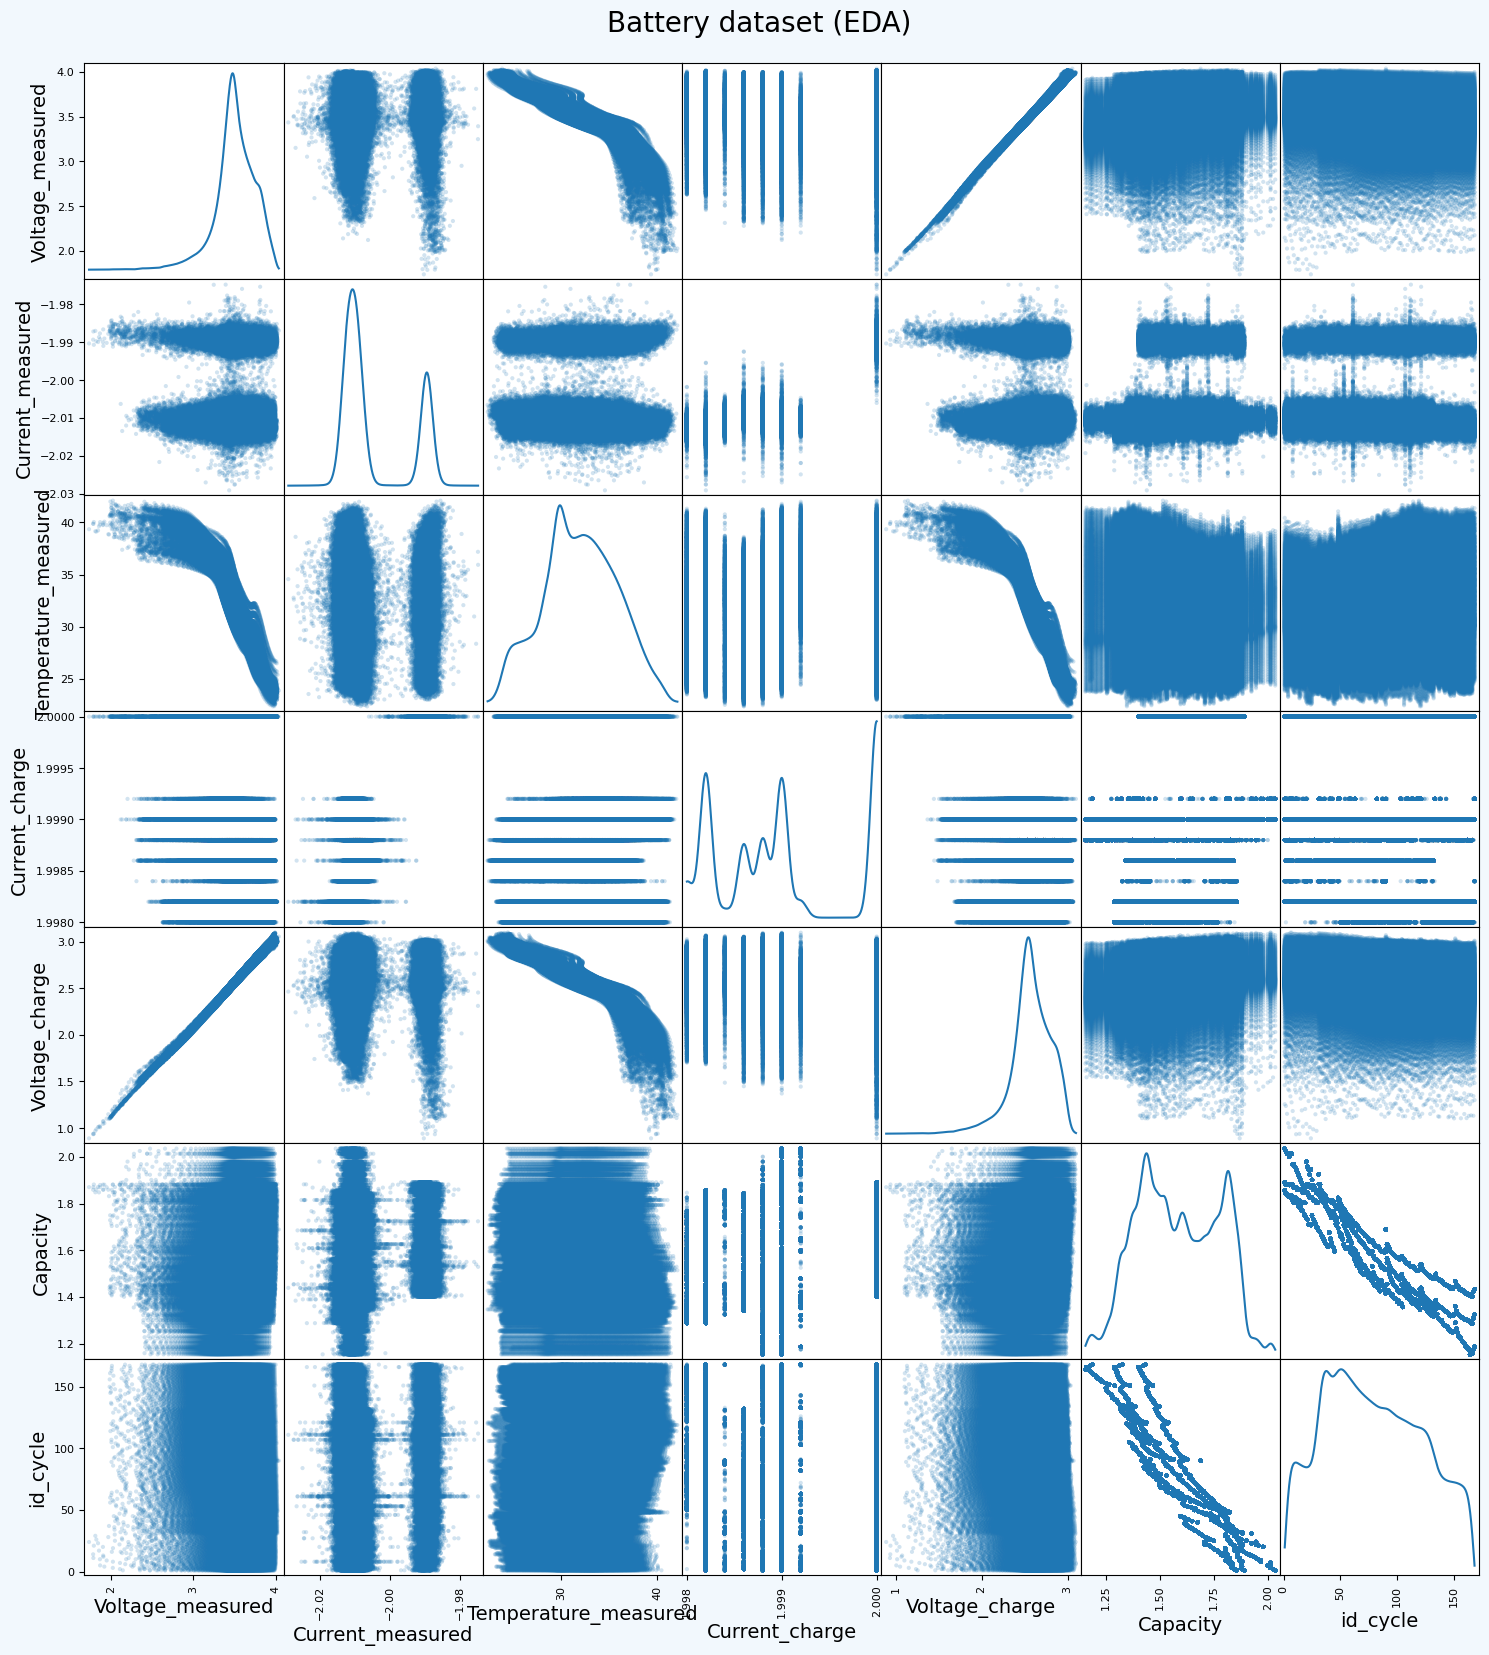

In [4]:
from pandas.plotting import scatter_matrix

# Drop unnecessary columns
df_reduced = df.drop(columns=['Time', 'type', 'ambient_temperature', 'time', 'Battery'])

# Create scatter matrix
scatter_matrix_fig = scatter_matrix(df_reduced, alpha=0.2, figsize=(18, 18), diagonal='kde')

# Customize the appearance
for ax in scatter_matrix_fig.ravel():
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.title.set_size(14)
    ax.grid(False)

plt.suptitle('Battery dataset (EDA)', size=20)
plt.gcf().patch.set_facecolor('#f2f8fd')
plt.subplots_adjust(top=0.95)
plt.show()


In [5]:
df['Battery'].unique()

array(['B0005', 'B0006', 'B0007', 'B0018'], dtype=object)

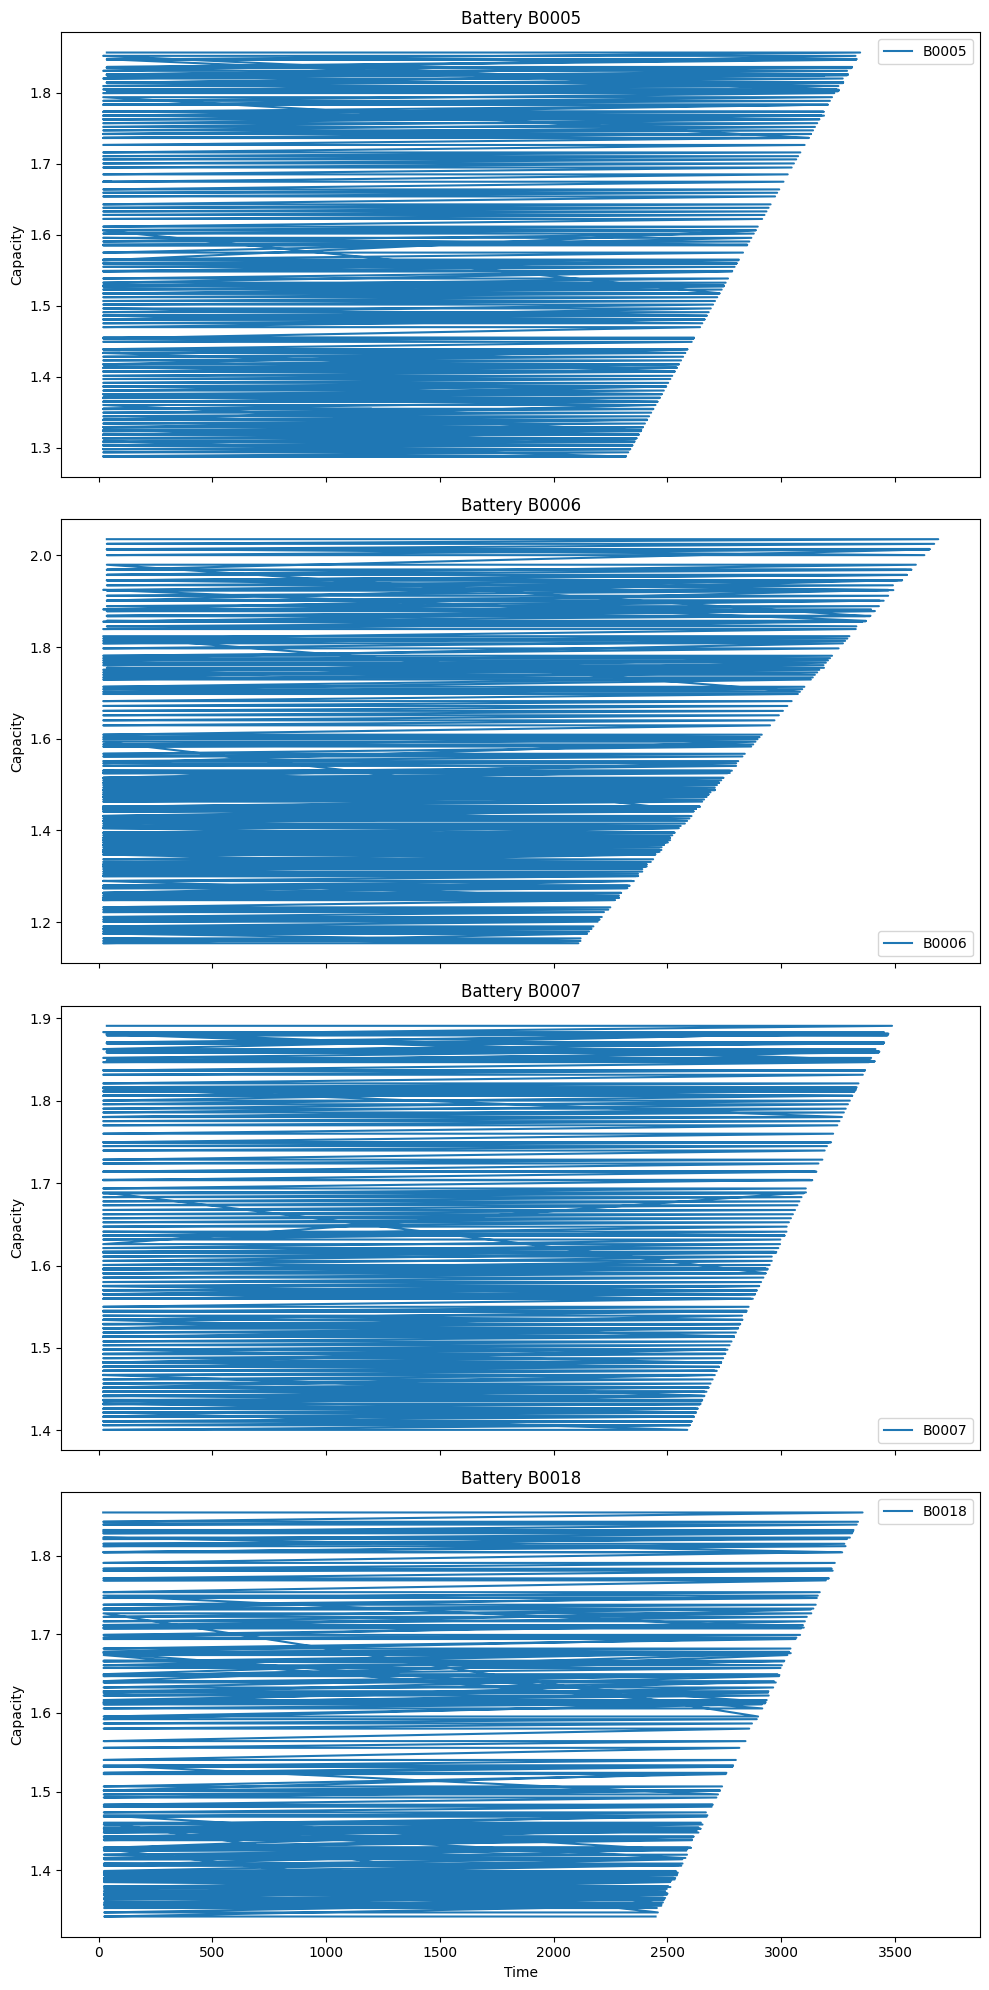

In [6]:


# Get unique batteries
unique_batteries = df['Battery'].unique()

# Create subplots
fig, axes = plt.subplots(len(unique_batteries), 1, figsize=(10, 5 * len(unique_batteries)), sharex=True)

# Add traces for each battery
for i, battery in enumerate(unique_batteries):
    battery_data = df[df['Battery'] == battery]
    axes[i].plot(battery_data['Time'], battery_data['Capacity'], label=battery)
    axes[i].set_title(f'Battery {battery}')
    axes[i].set_ylabel('Capacity')
    axes[i].legend()

# Set common labels
axes[-1].set_xlabel('Time')

# Adjust layout
plt.tight_layout()
plt.show()


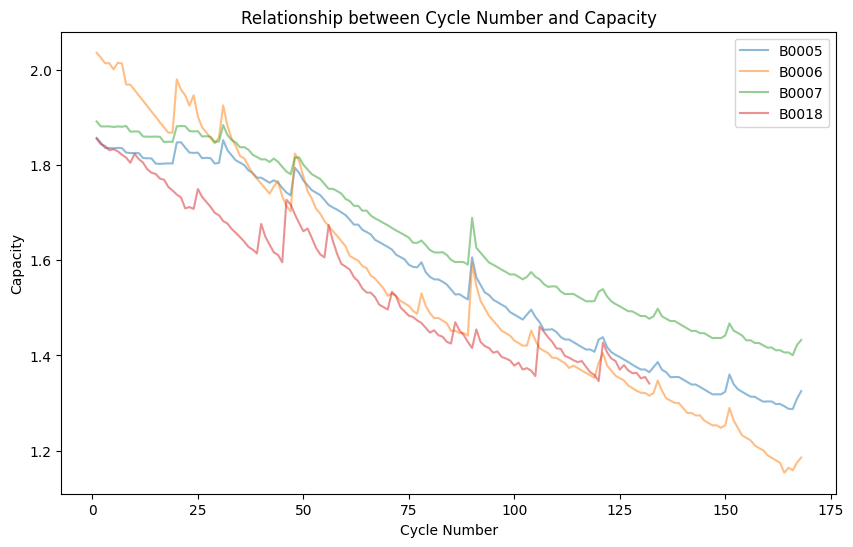

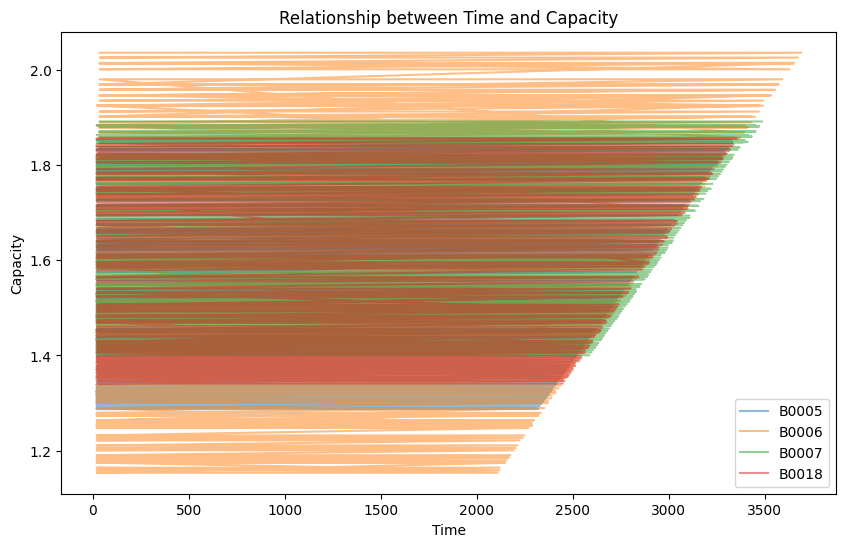

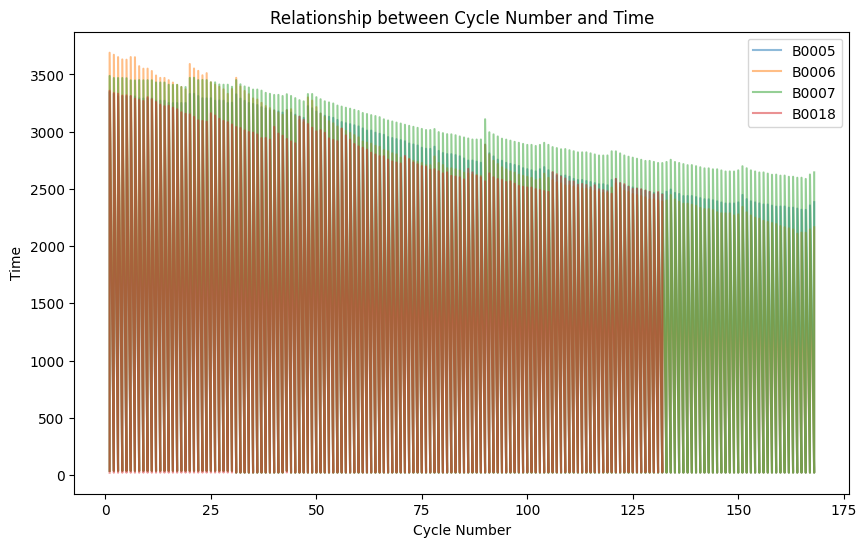

In [7]:
# Plot the relationship between cycle and capacity for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['id_cycle'], battery_data['Capacity'], label=battery, alpha=0.5)

ax.set_xlabel('Cycle Number')
ax.set_ylabel('Capacity')
ax.set_title('Relationship between Cycle Number and Capacity')
ax.legend()
plt.show()

# Plot the relationship between time and capacity for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['Time'], battery_data['Capacity'], label=battery,alpha=0.5)

ax.set_xlabel('Time')
ax.set_ylabel('Capacity')
ax.set_title('Relationship between Time and Capacity')
ax.legend()
plt.show()

# Plot the relationship between cycle and time for each battery
fig, ax = plt.subplots(figsize=(10, 6))

for battery in unique_batteries:
    battery_data = df[df['Battery'] == battery]
    ax.plot(battery_data['id_cycle'], battery_data['Time'], label=battery,alpha=0.5)

ax.set_xlabel('Cycle Number')
ax.set_ylabel('Time')
ax.set_title('Relationship between Cycle Number and Time')
ax.legend()
plt.show()

So every cycle started, the time goes back to 0 ?



In [8]:
# Split each battery into an individual dataframe
battery_dfs = {battery: df[df['Battery'] == battery].copy() for battery in unique_batteries}

# Reorganize each battery dataframe
for battery, battery_df in battery_dfs.items():
    reorg_t_df = battery_df.groupby(['id_cycle']).max().reset_index()
    reorg_t_df['Cumulated_time'] = reorg_t_df['Time'].cumsum() / 3600  # Convert seconds to hours
    battery_dfs[battery] = reorg_t_df

# Display the first few rows of each reorganized dataframe
for battery, reorg_t_df in battery_dfs.items():
    print(f"Battery {battery} Reorganized DataFrame:")
    print(reorg_t_df.head())
    print("\n")

Battery B0005 Reorganized DataFrame:
   id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
0         1          3.974871         -2.008709             38.904112   
1         2          3.979157         -2.008829             38.934590   
2         3          3.979995         -2.007352             38.743649   
3         4          3.981613         -2.008008             38.672511   
4         5          3.982253         -2.009143             38.558828   

   Current_charge  Voltage_charge      Time  Capacity       type  \
0          1.9984           3.062  3346.937  1.856487  discharge   
1          1.9984           3.056  3328.828  1.846327  discharge   
2          1.9984           3.055  3309.422  1.835349  discharge   
3          1.9984           3.055  3309.719  1.835263  discharge   
4          1.9984           3.056  3307.688  1.834646  discharge   

   ambient_temperature    time Battery  Cumulated_time  
0                   24  2008.0   B0005        0.929705  
1

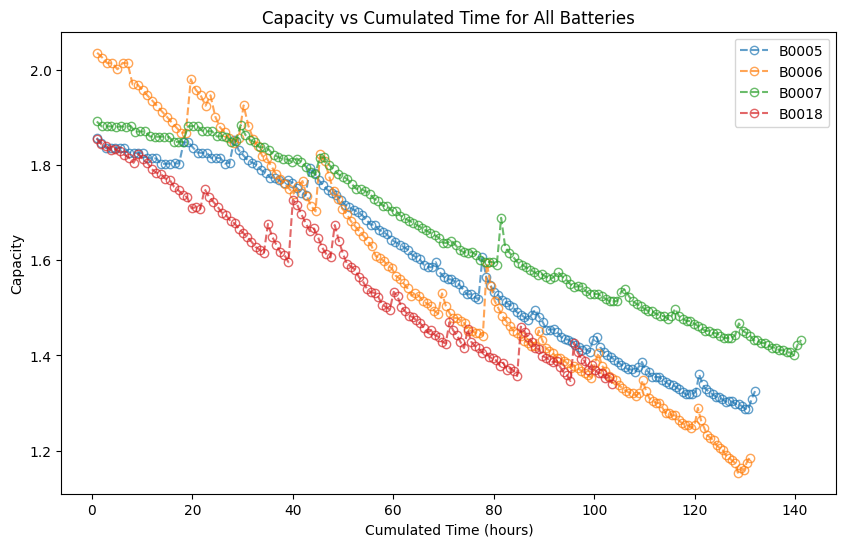

In [9]:
# Plot capacity vs cumulative time for all batteries
fig, ax = plt.subplots(figsize=(10, 6))

for battery, reorg_t_df in battery_dfs.items():
    ax.plot(reorg_t_df['Cumulated_time'], reorg_t_df['Capacity'], label=battery, alpha=0.7, linestyle='--', marker='o', markerfacecolor='none')

ax.set_xlabel('Cumulated Time (hours)')
ax.set_ylabel('Capacity')
ax.set_title('Capacity vs Cumulated Time for All Batteries')
ax.legend()
plt.show()

# Physical Model

Physical model according to [1]. The basic equation is:

$$L = 1 − (1 − L')e^{-f_d}$$

Where \(L\) is the battery lifetime and \(L'\) is the initial battery lifetime. \(f_d\) is a Linearized degradation rate per unit time and per cycle. It can be described as:

$$f_d = f_d(t, \delta, \sigma, T_c)$$

where \(t\) is charging time, \(\delta\) is the cycle depth of discharge, \(\sigma\) is the cycle average state of charge, and \(T_c\) is the cell temperature. The equation for battery capacity could be written as follows:

$$C = C_0e^{f_d}$$

We have empirically found that \(f_d\) approximates to:

$$f_d = \frac{kT_Ci}{t}$$

where \(k = 0.13\), \(i\) is the cycle number, and \(t\) is the charge time for every cycle.

---

[1] Xu, Bolun & Oudalov, Alexandre & Ulbig, Andreas & Andersson, Göran & Kirschen, D.S. (2016). *Modeling of Lithium-Ion Battery Degradation for Cell Life Assessment.* IEEE Transactions on Smart Grid, 99, 1–1. DOI: 10.1109/TSG.2016.2578950.



The following functions implement an exponential-decay model for lithium-ion battery capacity, based on the idea that capacity \(C\) at cycle \(i\) follows:

\[
C(i) = C_0 \cdot e^{-f_d},
\]
where:
- \(C_0\) is the initial capacity at cycle 0.
- \(i\) is the current cycle number.
- \(f_d\) is a linearized degradation rate:  
  \[
  f_d = \frac{k \cdot T_c \cdot i}{t}.
  \]
  Here, \(k\) is an empirical constant, \(T_c\) is cell temperature, and \(t\) is the charge time per cycle.

Initial Capacity: Extracted from the first row of the DataFrame (
C
0
C 
0
​
 ).
Iteration: Each row is treated as a distinct cycle (
𝑖
i), determined by the row index.
Physical Model: For each cycle, physical_model is called to compute the predicted capacity, which is then recorded in a new column 'C. Capacity'.




In [10]:
import numpy as np

def physical_model(C_0, cycle_number, charge_time, temperature, k=0.13):
    """
    Calculate the battery's capacity at a given cycle using an exponential decay model.

    Parameters:
        C_0 (float): Initial battery capacity (e.g., at cycle 0).
        cycle_number (int): The current cycle number.
        charge_time (float): Charge time per cycle.
        temperature (float): Cell temperature.
        k (float): Empirical degradation constant (default is 0.13).

    Returns:
        float: Predicted battery capacity at the specified cycle.
    """
    # Linearized degradation factor
    f_d = (k * temperature * cycle_number) / charge_time
    return C_0 * np.exp(-f_d)


def predict_capacity_physical_model(df, k=0.13):
    """
    Compute a 'corrected' or model-predicted capacity for each row in the DataFrame,
    using the physical_model function. Assumes that the index of dfb corresponds
    to the battery cycle number.

    Parameters:
        df (pd.DataFrame): 
            Must contain columns:
            - 'Capacity': Observed/measured capacity.
            - 'Temperature_measured': The cell temperature.
            - 'Time': Charge time for that cycle.
            The DataFrame index is interpreted as the cycle number (0, 1, 2, ...).

        k (float): Empirical constant for degradation (default is 0.13).

    Returns:
        pd.DataFrame: Same DataFrame with a new column 'C. Capacity' that holds
                      the model-predicted (corrected) capacity.
    """
    # Use the first row's capacity as the initial capacity C_0
    initial_capacity = df['Capacity'].iloc[0]
    Predicted_capacities = []

    for cycle_number, row in df.iterrows():
        charge_time = row['Time']
        temperature = row['Temperature_measured']
        
        # Calculate capacity for this cycle using the physical model
        predicted_capacity = physical_model(
            C_0=initial_capacity,
            cycle_number=cycle_number,
            charge_time=charge_time,
            temperature=temperature,
            k=k
        )
        Predicted_capacities.append(predicted_capacity)

    # Store the predicted capacity in a new column
    df['C. Capacity_ physical'] = Predicted_capacities
    return df


Battery B0005 Corrected DataFrame:
   id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
0         1          3.974871         -2.008709             38.904112   
1         2          3.979157         -2.008829             38.934590   
2         3          3.979995         -2.007352             38.743649   
3         4          3.981613         -2.008008             38.672511   
4         5          3.982253         -2.009143             38.558828   

   Current_charge  Voltage_charge      Time  Capacity       type  \
0          1.9984           3.062  3346.937  1.856487  discharge   
1          1.9984           3.056  3328.828  1.846327  discharge   
2          1.9984           3.055  3309.422  1.835349  discharge   
3          1.9984           3.055  3309.719  1.835263  discharge   
4          1.9984           3.056  3307.688  1.834646  discharge   

   ambient_temperature    time Battery  Cumulated_time  C. Capacity_ physical  
0                   24  2008.0   B000

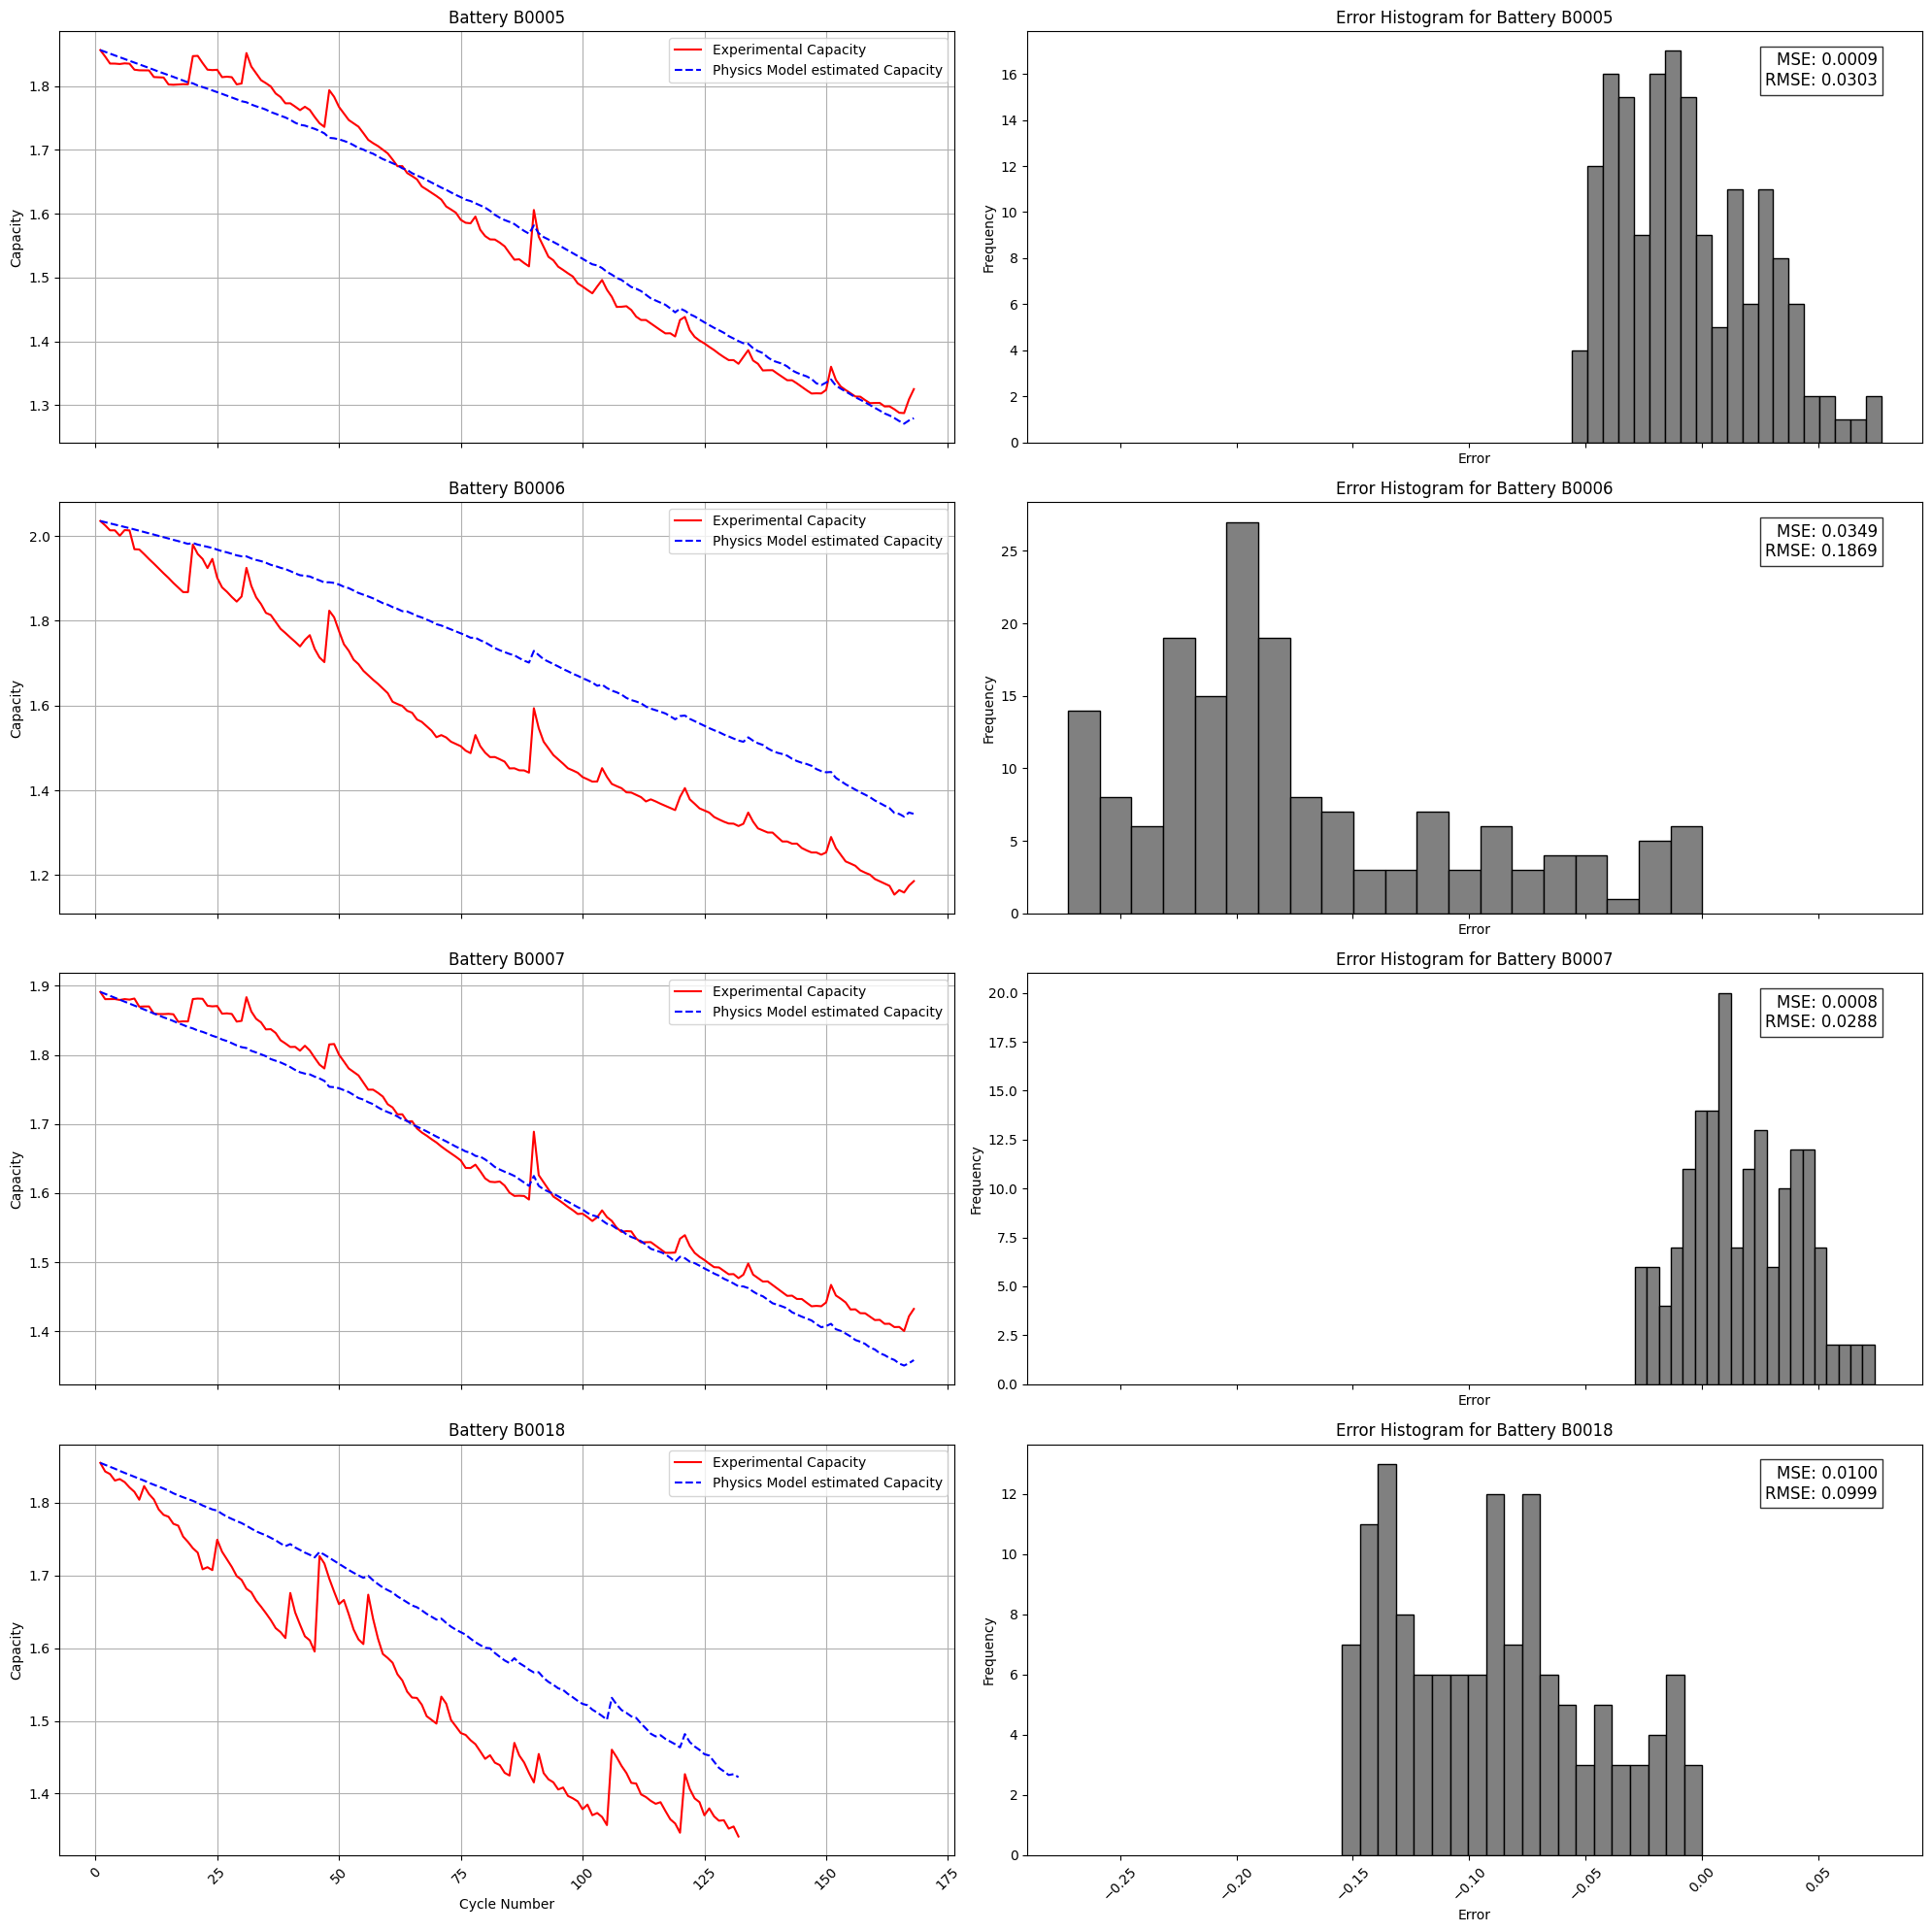

In [12]:
fig, axes = plt.subplots(len(battery_dfs), 2, figsize=(20, 5 * len(battery_dfs)), sharex='col')

for i, (battery, reorg_t_df) in enumerate(battery_dfs.items()):
    # Calculate predicted capacity
    reorg_t_df_predict = predict_capacity_physical_model(reorg_t_df, k=0.13)
    
    # Display the first few rows of the corrected dataframe
    print(f"Battery {battery} Corrected DataFrame:")
    print(reorg_t_df_predict.head())
    print("\n")
    
    # Plot experimental capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['Capacity'], label='Experimental Capacity', color='red')
    
    # Plot corrected capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['C. Capacity_ physical'], label='Physics Model estimated Capacity', color='blue', linestyle='--')
    
    axes[i, 0].set_title(f'Battery {battery}')
    axes[i, 0].set_ylabel('Capacity')
    axes[i, 0].legend()
    axes[i, 0].grid()
    
    # Rotate x-axis labels for readability
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Calculate error
    error = reorg_t_df_predict['Capacity'] - reorg_t_df_predict['C. Capacity_ physical']
    
    # Plot error histogram
    axes[i, 1].hist(error, bins=20, color='gray', edgecolor='black')
    axes[i, 1].set_title(f'Error Histogram for Battery {battery}')
    axes[i, 1].set_xlabel('Error')
    axes[i, 1].set_ylabel('Frequency')
    
    # Rotate x-axis labels for readability
    axes[i, 1].tick_params(axis='x', rotation=45)
    
    # Calculate RMSE and MSE
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    
    # Display RMSE and MSE on the histogram
    axes[i, 1].text(0.95, 0.95, f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}', 
                    transform=axes[i, 1].transAxes, fontsize=12,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))

# Set common labels
axes[-1, 0].set_xlabel('Cycle Number')

# Adjust layout
plt.tight_layout()
plt.show()

## Capacity prediciton using Neural Network 

In [13]:
battery_dfs

{'B0005':      id_cycle  Voltage_measured  Current_measured  Temperature_measured  \
 0           1          3.974871         -2.008709             38.904112   
 1           2          3.979157         -2.008829             38.934590   
 2           3          3.979995         -2.007352             38.743649   
 3           4          3.981613         -2.008008             38.672511   
 4           5          3.982253         -2.009143             38.558828   
 ..        ...               ...               ...                   ...   
 163       164          3.970419         -2.009389             40.864674   
 164       165          3.969450         -2.007246             40.857545   
 165       166          3.969489         -2.008697             40.937025   
 166       167          3.964731         -2.009055             40.936092   
 167       168          3.982260         -2.003196             40.873909   
 
      Current_charge  Voltage_charge      Time  Capacity       type  \
 0    

### Pure Emperical using neural network

There are many different kind of target that can use the technique for prediciotn. 
1. predict the capacity vs cycle behaviour of a unseen cell 
2. predict the capacity vs cycle of future cycles (more complicated, can use different kinds of time-series algorithm to do this )
3. maybe more ideas later


### 1. Predict the capacity vs cycle behaviour of a unseen cell 

In [14]:
## Train test split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Split the data into training, testing, and validation sets based on batteries
train_batteries = list(battery_dfs.keys())
validation_battery = train_batteries.pop(np.random.randint(len(train_batteries)))
print(f"Training batteries: {train_batteries}")
print(f"Validation battery: {validation_battery}")

# Combine data from training batteries
train_test_data = pd.concat([battery_dfs[battery] for battery in train_batteries if battery != validation_battery])
validation_battery_data = battery_dfs[validation_battery]

# Further split train_test_data into training and testing sets
train_data, test_data = train_test_split(train_test_data, test_size=0.2, random_state=42)

# Feature selection
X_train = train_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_train = train_data['Capacity']

X_test = test_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_test = test_data['Capacity']

X_validation = validation_battery_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_validation = validation_battery_data['Capacity']


Training batteries: ['B0005', 'B0007', 'B0018']
Validation battery: B0006


In [15]:
# TensorFlow training

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2090.3298 - val_loss: 29.0741
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.2805 - val_loss: 73.8588
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.4223 - val_loss: 3.9149
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8675 - val_loss: 0.8571
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5083 - val_loss: 1.9269
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1045 - val_loss: 0.8191
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4588 - val_loss: 0.6042
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4205 - val_loss: 0.2753
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1966 - val_loss: 0.1807
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1553 - val_loss: 0.0803
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831 - val_loss: 0.0672
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0612

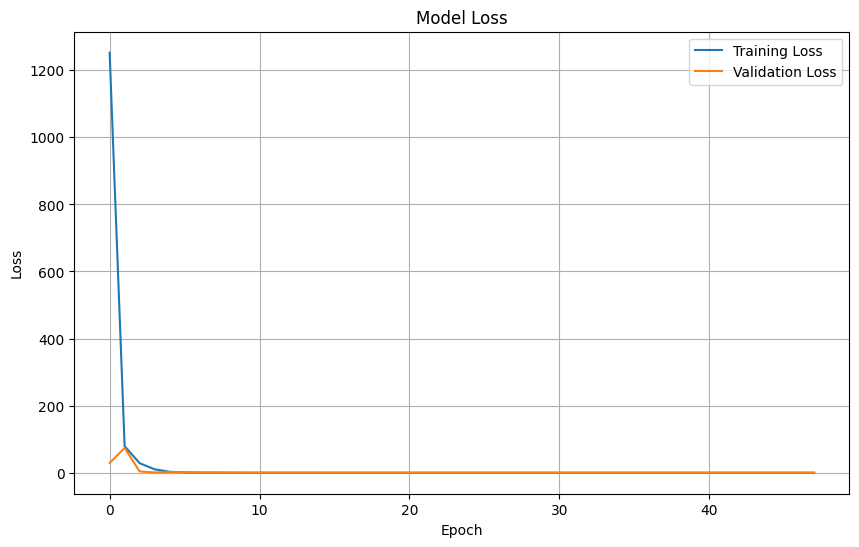

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


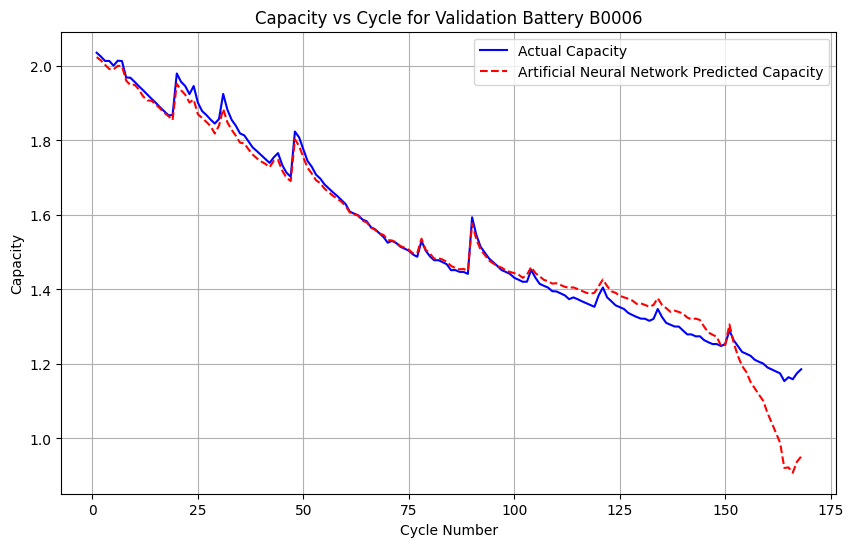

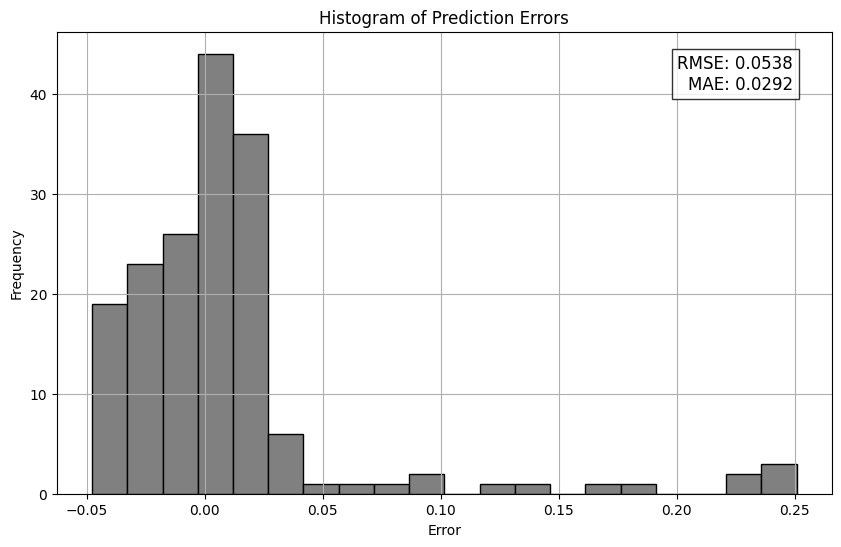

In [17]:
# Predict the capacity for the validation data
y_pred_validation = model.predict(X_validation)

# Plot the actual vs predicted capacity for the validation battery
plt.figure(figsize=(10, 6))
plt.plot(validation_battery_data['id_cycle'], y_validation, label='Actual Capacity', color='blue')
plt.plot(validation_battery_data['id_cycle'], y_pred_validation, label='Artificial Neural Network Predicted Capacity', color='red', linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity')
plt.title(f'Capacity vs Cycle for Validation Battery {validation_battery}')
plt.legend()
plt.grid(True)
plt.show()

# Calculate errors
errors = y_validation - y_pred_validation.flatten()

# Calculate RMSE and MAE
rmse = np.sqrt(np.mean(errors**2))
mae = np.mean(np.abs(errors))

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='gray', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)

# Display RMSE and MAE on the plot
plt.text(0.95, 0.95, f'RMSE: {rmse:.4f}\nMAE: {mae:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

### 2. Predict future cycles

In [18]:
## Train test split
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Combine data from all batteries except the validation battery
all_data = pd.concat([battery_dfs[battery] for battery in battery_dfs if battery != validation_battery])

# Calculate the split indices
train_idx = int(0.7 * len(all_data))
test_idx = int(0.9 * len(all_data))

# Split the data into training, testing, and validation sets
train_data = all_data.iloc[:train_idx]
test_data = all_data.iloc[train_idx:test_idx]
validation_data = all_data.iloc[test_idx:]

# Feature selection
X_train = train_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_train = train_data['Capacity']

X_test = test_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_test = test_data['Capacity']

X_validation = validation_data[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_validation = validation_data['Capacity']


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 417.2248 - val_loss: 33.8224
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.8949 - val_loss: 18.4801
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0361 - val_loss: 8.9284
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2864 - val_loss: 3.6903
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3421 - val_loss: 1.7607
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4985 - val_loss: 0.4416
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1973 - val_loss: 0.0618
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087 - val_loss: 0.0706
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0750 - val_loss: 0.1095
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0571 - val_loss: 0.0645
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0534 - val_loss: 0.0490
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0393 - val_loss: 0.0156
Epoch 1

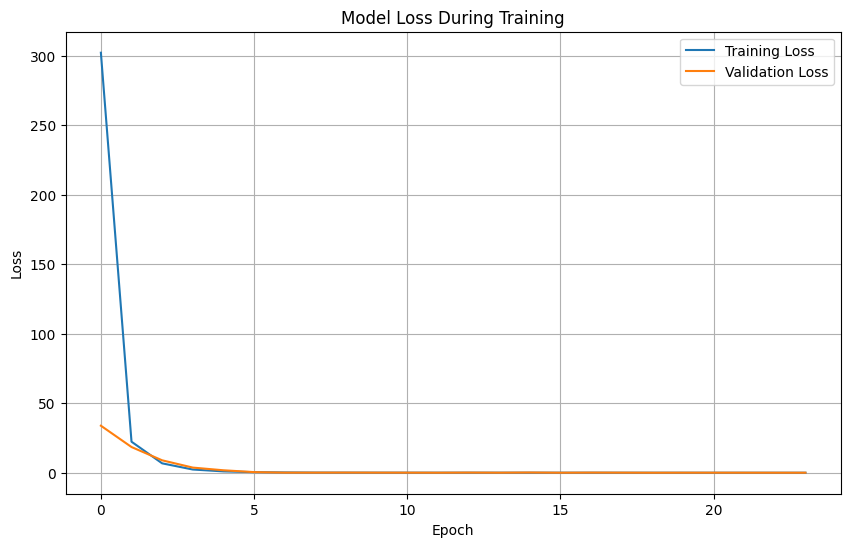

In [20]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [21]:
# Extract the validation data range from validation_battery_data
id_cycle_range = range(125, 180)
validation_data_range = validation_battery_data[validation_battery_data['id_cycle'].isin(id_cycle_range)]
X_vali_input = validation_data_range[['id_cycle', 'Time', 'Voltage_measured', 'Current_measured', 'Temperature_measured']]
y_pred_vali_range = model.predict(X_vali_input)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [22]:
validation_data_range

,id_cycle,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,type,ambient_temperature,time,Battery,Cumulated_time,C. Capacity_ physical
124,125,3.931643,-2.005860,41.294207,1.9990,2.997,2455.500,1.352493,discharge,24,2008.0,B0006,103.610839,1.552042
125,126,3.930864,-2.006471,41.336508,1.9992,2.995,2446.078,1.347410,discharge,24,2008.0,B0006,104.290305,1.546588
126,127,3.929979,-2.006023,41.332881,1.9990,2.989,2436.922,1.337008,discharge,24,2008.0,B0006,104.967227,1.541628
127,128,3.929272,-2.006425,41.255103,1.9990,2.991,2426.734,1.331235,discharge,24,2008.0,B0006,105.641320,1.537238
128,129,3.926079,-2.005368,41.159098,1.9990,2.991,2407.812,1.325930,discharge,24,2008.0,B0006,106.310157,1.531454
129,130,3.927377,-2.006653,41.275803,1.9990,2.991,2408.859,1.321579,discharge,24,2008.0,B0006,106.979284,1.527004
130,131,3.927341,-2.006609,41.257860,1.9990,2.988,2399.187,1.321225,discharge,24,2008.0,B0006,107.645725,1.522021
131,132,3.926813,-2.005951,41.198679,1.9990,2.994,2389.359,1.315649,discharge,24,2008.0,B0006,108.309436,1.517434
132,133,3.915702,-2.006426,41.330153,1.9992,2.976,2398.922,1.320903,discharge,24,2008.0,B0006,108.975803,1.514398
133,134,3.940484,-2.003935,40.846950,1.9990,3.007,2446.359,1.347433,discharge,24,2008.0,B0006,109.655347,1.524963


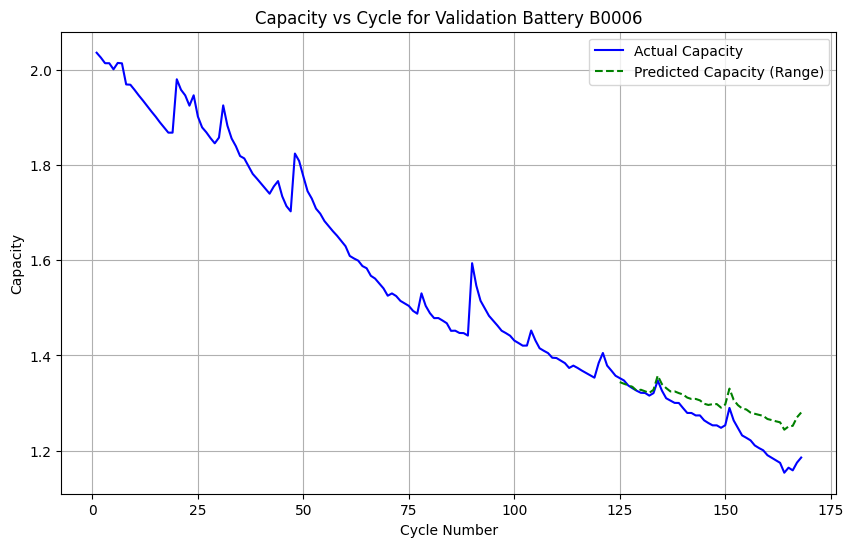

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(validation_battery_data['id_cycle'], validation_battery_data['Capacity'], label='Actual Capacity', color='blue')
plt.plot(validation_data_range['id_cycle'], y_pred_vali_range, label='Predicted Capacity (Range)', color='green', linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('Capacity')
plt.title(f'Capacity vs Cycle for Validation Battery {validation_battery}')
plt.legend()
plt.grid(True)
plt.show()

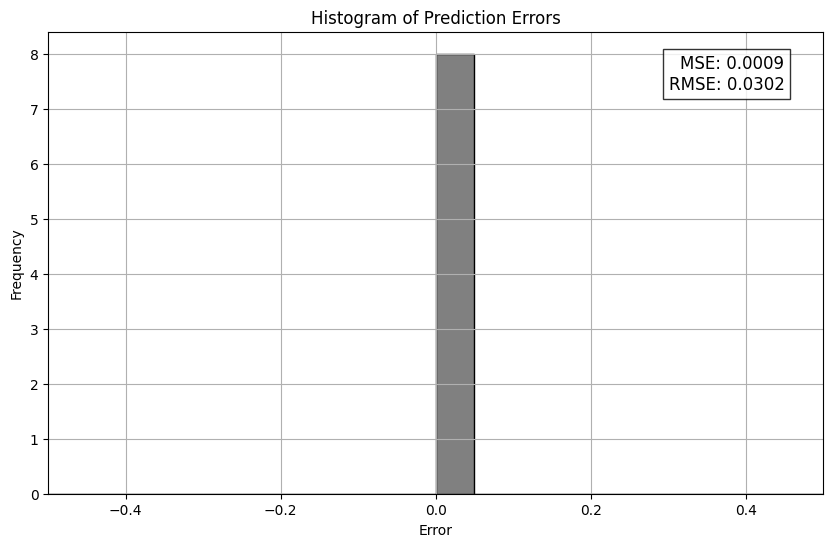

In [27]:
# Trim the actual data to the same range of id_cycle of predicted capacity
trimmed_actual_data = y_validation[y_validation.index.isin(validation_data_range.index)]

# Ensure both arrays have the same shape
trimmed_actual_data = trimmed_actual_data[:len(y_pred_vali_range)]

# Calculate errors
errors = trimmed_actual_data.values - y_pred_vali_range[:len(trimmed_actual_data)].flatten()

# Calculate RMSE and MSE
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color='gray', edgecolor='black', range=(-0.5, 0.5))
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)

# Display RMSE and MSE on the plot
plt.text(0.95, 0.95, f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.xlim(-0.5, 0.5)
plt.show()

## Try hybrid between physical and pure empirical, 

In [44]:
import numpy as np
import pandas as pd
from math import e
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def physical_model(C_0, cycle_number, charge_time, temperature, k=0.13):
    """
    Calculate the battery's capacity at a given cycle using an exponential decay model.
    
    Parameters:
        C_0 (float): Initial battery capacity (e.g., at cycle 0).
        cycle_number (int): The current cycle number.
        charge_time (float): Charge time per cycle.
        temperature (float): Cell temperature.
        k (float): Empirical degradation constant (default is 0.13).

    Returns:
        float: Predicted battery capacity at the specified cycle.
    """
    f_d = (k * temperature * cycle_number) / charge_time
    return C_0 * np.exp(-f_d)

def predict_capacity_physical_model(df, k=0.13):
    """
    Compute a 'physical model' capacity for each row in the DataFrame.
    Assumes the index of df corresponds to the battery cycle number.

    Parameters:
        df (pd.DataFrame):
            Must contain columns:
            - 'Capacity': Observed/measured capacity.
            - 'Temperature_measured': The cell temperature.
            - 'Time': Charge time for that cycle.
        
        k (float): Empirical constant for degradation (default is 0.13).

    Returns:
        pd.DataFrame: Same DataFrame with a new column 'C. Capacity_physical' 
                      containing the model-predicted capacity.
    """
    initial_capacity = df['Capacity'].iloc[0]
    predicted_capacities = []
    
    for cycle_number, row in df.iterrows():
        charge_time = row['Time']
        temperature = row['Temperature_measured']
        
        modeled_capacity = physical_model(
            C_0=initial_capacity,
            cycle_number=cycle_number,
            charge_time=charge_time,
            temperature=temperature,
            k=k
        )
        predicted_capacities.append(modeled_capacity)
    
    df['C. Capacity_physical'] = predicted_capacities
    return df

def train_hybrid_model(df, 
                       test_size=0.2, 
                       epochs=100, 
                       batch_size=20, 
                       k=0.13,
                       future_start=168, 
                       future_end=500,
                       reference_cycle=167):
    """
    Train a semi-physical (hybrid) model that corrects the physical_model's output
    using a neural network, then optionally predict future cycles.

    Steps:
        1. Compute physically modeled capacity for existing data.
        2. Calculate the residual (observed - modeled).
        3. Train a neural network on the residual using the physical-model output as input.
        4. Predict future capacity for cycles [future_start .. future_end] by:
            a) Generating the physical model's output.
            b) Using the trained model to predict the residual.
            c) Summing the two to get the final hybrid prediction.
    
    Parameters:
        df (pd.DataFrame):
            Must have columns: 'Capacity', 'Temperature_measured', 'Time'.
            The DataFrame index is interpreted as cycle number (0, 1, 2, ...).
        
        test_size (float): Fraction of data reserved for testing the neural network.
        epochs (int): Number of epochs for network training.
        batch_size (int): Batch size for training.
        k (float): Empirical constant for the physical model (default 0.13).
        future_start (int): First future cycle to predict.
        future_end (int): Last future cycle to predict (inclusive).
        reference_cycle (int): Row index in df from which temperature & charge_time
                               will be taken for future-cycle calculation.

    Returns:
        model (Sequential): Trained neural network for residual correction.
        df (pd.DataFrame): Updated with:
            - 'C. Capacity_physical': Physical prediction on existing data.
            - 'Residual': Observed - physical capacity on existing data.
            - 'Predicted_residual': NN-predicted residual on existing data.
            - 'C. Capacity_hybrid': Hybrid capacity = physical + predicted residual.
        df_future (pd.DataFrame): DataFrame with columns:
            - 'cycle': Future cycle numbers from future_start to future_end.
            - 'C. Capacity_physical': Physical capacity estimate for future cycles.
            - 'Predicted_residual': NN residual prediction for future cycles.
            - 'C. Capacity_hybrid': Final hybrid capacity estimate for future cycles.
    """
    # 1. Generate physical predictions for the existing data
    df = predict_capacity_physical_model(df, k=k)

    # 2. Compute the residual for the existing dataset
    df['Residual'] = df['Capacity'] - df['C. Capacity_physical']

    # Prepare inputs (X) and outputs (y) for the neural network
    X = df[['C. Capacity_physical']]  # single feature: physical-model capacity
    y = df['Residual']

    # Split the data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=True
    )

    # 3. Build the neural network
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # single output: residual

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Predict the residual on the existing data
    df['Predicted_residual'] = model.predict(X)
    # Create the final hybrid estimate
    df['C. Capacity_hybrid'] = df['C. Capacity_physical'] + df['Predicted_residual']

    # 4. Predict future cycles: [future_start .. future_end]
    #    Use a single temperature and charge_time from `reference_cycle`
    #    (Note: This assumes constant T and t in future; adjust as needed.)
    
    # We'll build a DataFrame to store future predictions
    df_future = pd.DataFrame()
    df_future['cycle'] = np.arange(future_start, future_end + 1)

    # Grab reference temperature & time from the specified row
    ref_temperature = df['Temperature_measured'].iloc[reference_cycle]
    ref_time = df['Time'].iloc[reference_cycle]
    ref_initial_capacity = df['Capacity'].iloc[0]  # same initial capacity as the original

    # Physical estimate for future cycles
    L_e = 1 - np.exp(-k * df_future['cycle'] * ref_temperature / ref_time)
    X_in_e = -(L_e * ref_initial_capacity) + ref_initial_capacity
    df_future['C. Capacity_physical'] = X_in_e

    # Neural network's residual prediction
    X_in_e_2D = X_in_e.values.reshape(-1, 1)  # shape (n_samples, 1)
    predicted_residuals = model.predict(X_in_e_2D).reshape(-1)
    df_future['Predicted_residual'] = predicted_residuals

    # Final hybrid capacity
    df_future['C. Capacity_hybrid'] = df_future['C. Capacity_physical'] + df_future['Predicted_residual']

    return model, df, df_future


Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020 - mae: 0.0359 - val_loss: 0.0019 - val_mae: 0.0380
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mae: 0.0302 - val_loss: 0.0020 - val_mae: 0.0356
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7216e-04 - mae: 0.0231 - val_loss: 0.0014 - val_mae: 0.0339
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2320e-04 - mae: 0.0225 - val_loss: 0.0014 - val_mae: 0.0336
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2643e-04 - mae: 0.0233 - val_loss: 0.0016 - val_mae: 0.0333
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3148e-04 - mae: 0.0226 - val_loss: 0.0015 - val_mae: 0.0331
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0113e-04 - mae: 0.0220 - val_loss: 0.0015 - val_mae: 0.0330
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0891e-04 - mae: 0.0215 - val_loss: 0.0015 - val_mae: 0.0329
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4125e-04

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0560 - mae: 0.2163 - val_loss: 0.0196 - val_mae: 0.0995
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 - mae: 0.0882 - val_loss: 0.0247 - val_mae: 0.1170
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080 - mae: 0.0661 - val_loss: 0.0096 - val_mae: 0.0896
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - mae: 0.0850 - val_loss: 0.0096 - val_mae: 0.0895
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0683 - val_loss: 0.0123 - val_mae: 0.0831
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mae: 0.0519 - val_loss: 0.0113 - val_mae: 0.0828
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 - mae: 0.0635 - val_loss: 0.0093 - val_mae: 0.0837
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mae: 0.0628 - val_loss: 0.0100 - val_mae: 0.0826
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0578 - val_loss: 0

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0441 - mae: 0.1933 - val_loss: 0.0014 - val_mae: 0.0319
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - mae: 0.0550 - val_loss: 0.0097 - val_mae: 0.0962
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0707 - val_loss: 5.3495e-04 - val_mae: 0.0192
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mae: 0.0291 - val_loss: 0.0016 - val_mae: 0.0345
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - mae: 0.0372 - val_loss: 4.7890e-04 - val_mae: 0.0185
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2929e-04 - mae: 0.0217 - val_loss: 0.0014 - val_mae: 0.0324
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - mae: 0.0263 - val_loss: 5.2637e-04 - val_mae: 0.0191
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9317e-04 - mae: 0.0201 - val_loss: 4.4957e-04 - val_mae: 0.0175
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0581e-04

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0054 - mae: 0.0604 - val_loss: 0.0027 - val_mae: 0.0458
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0400 - val_loss: 0.0036 - val_mae: 0.0468
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - mae: 0.0372 - val_loss: 0.0028 - val_mae: 0.0463
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 0.0428 - val_loss: 0.0029 - val_mae: 0.0434
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - mae: 0.0382 - val_loss: 0.0025 - val_mae: 0.0432
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mae: 0.0398 - val_loss: 0.0025 - val_mae: 0.0425
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mae: 0.0343 - val_loss: 0.0026 - val_mae: 0.0423
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0344 - val_loss: 0.0025 - val_mae: 0.0433
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - mae: 0.0384 - val_loss: 0

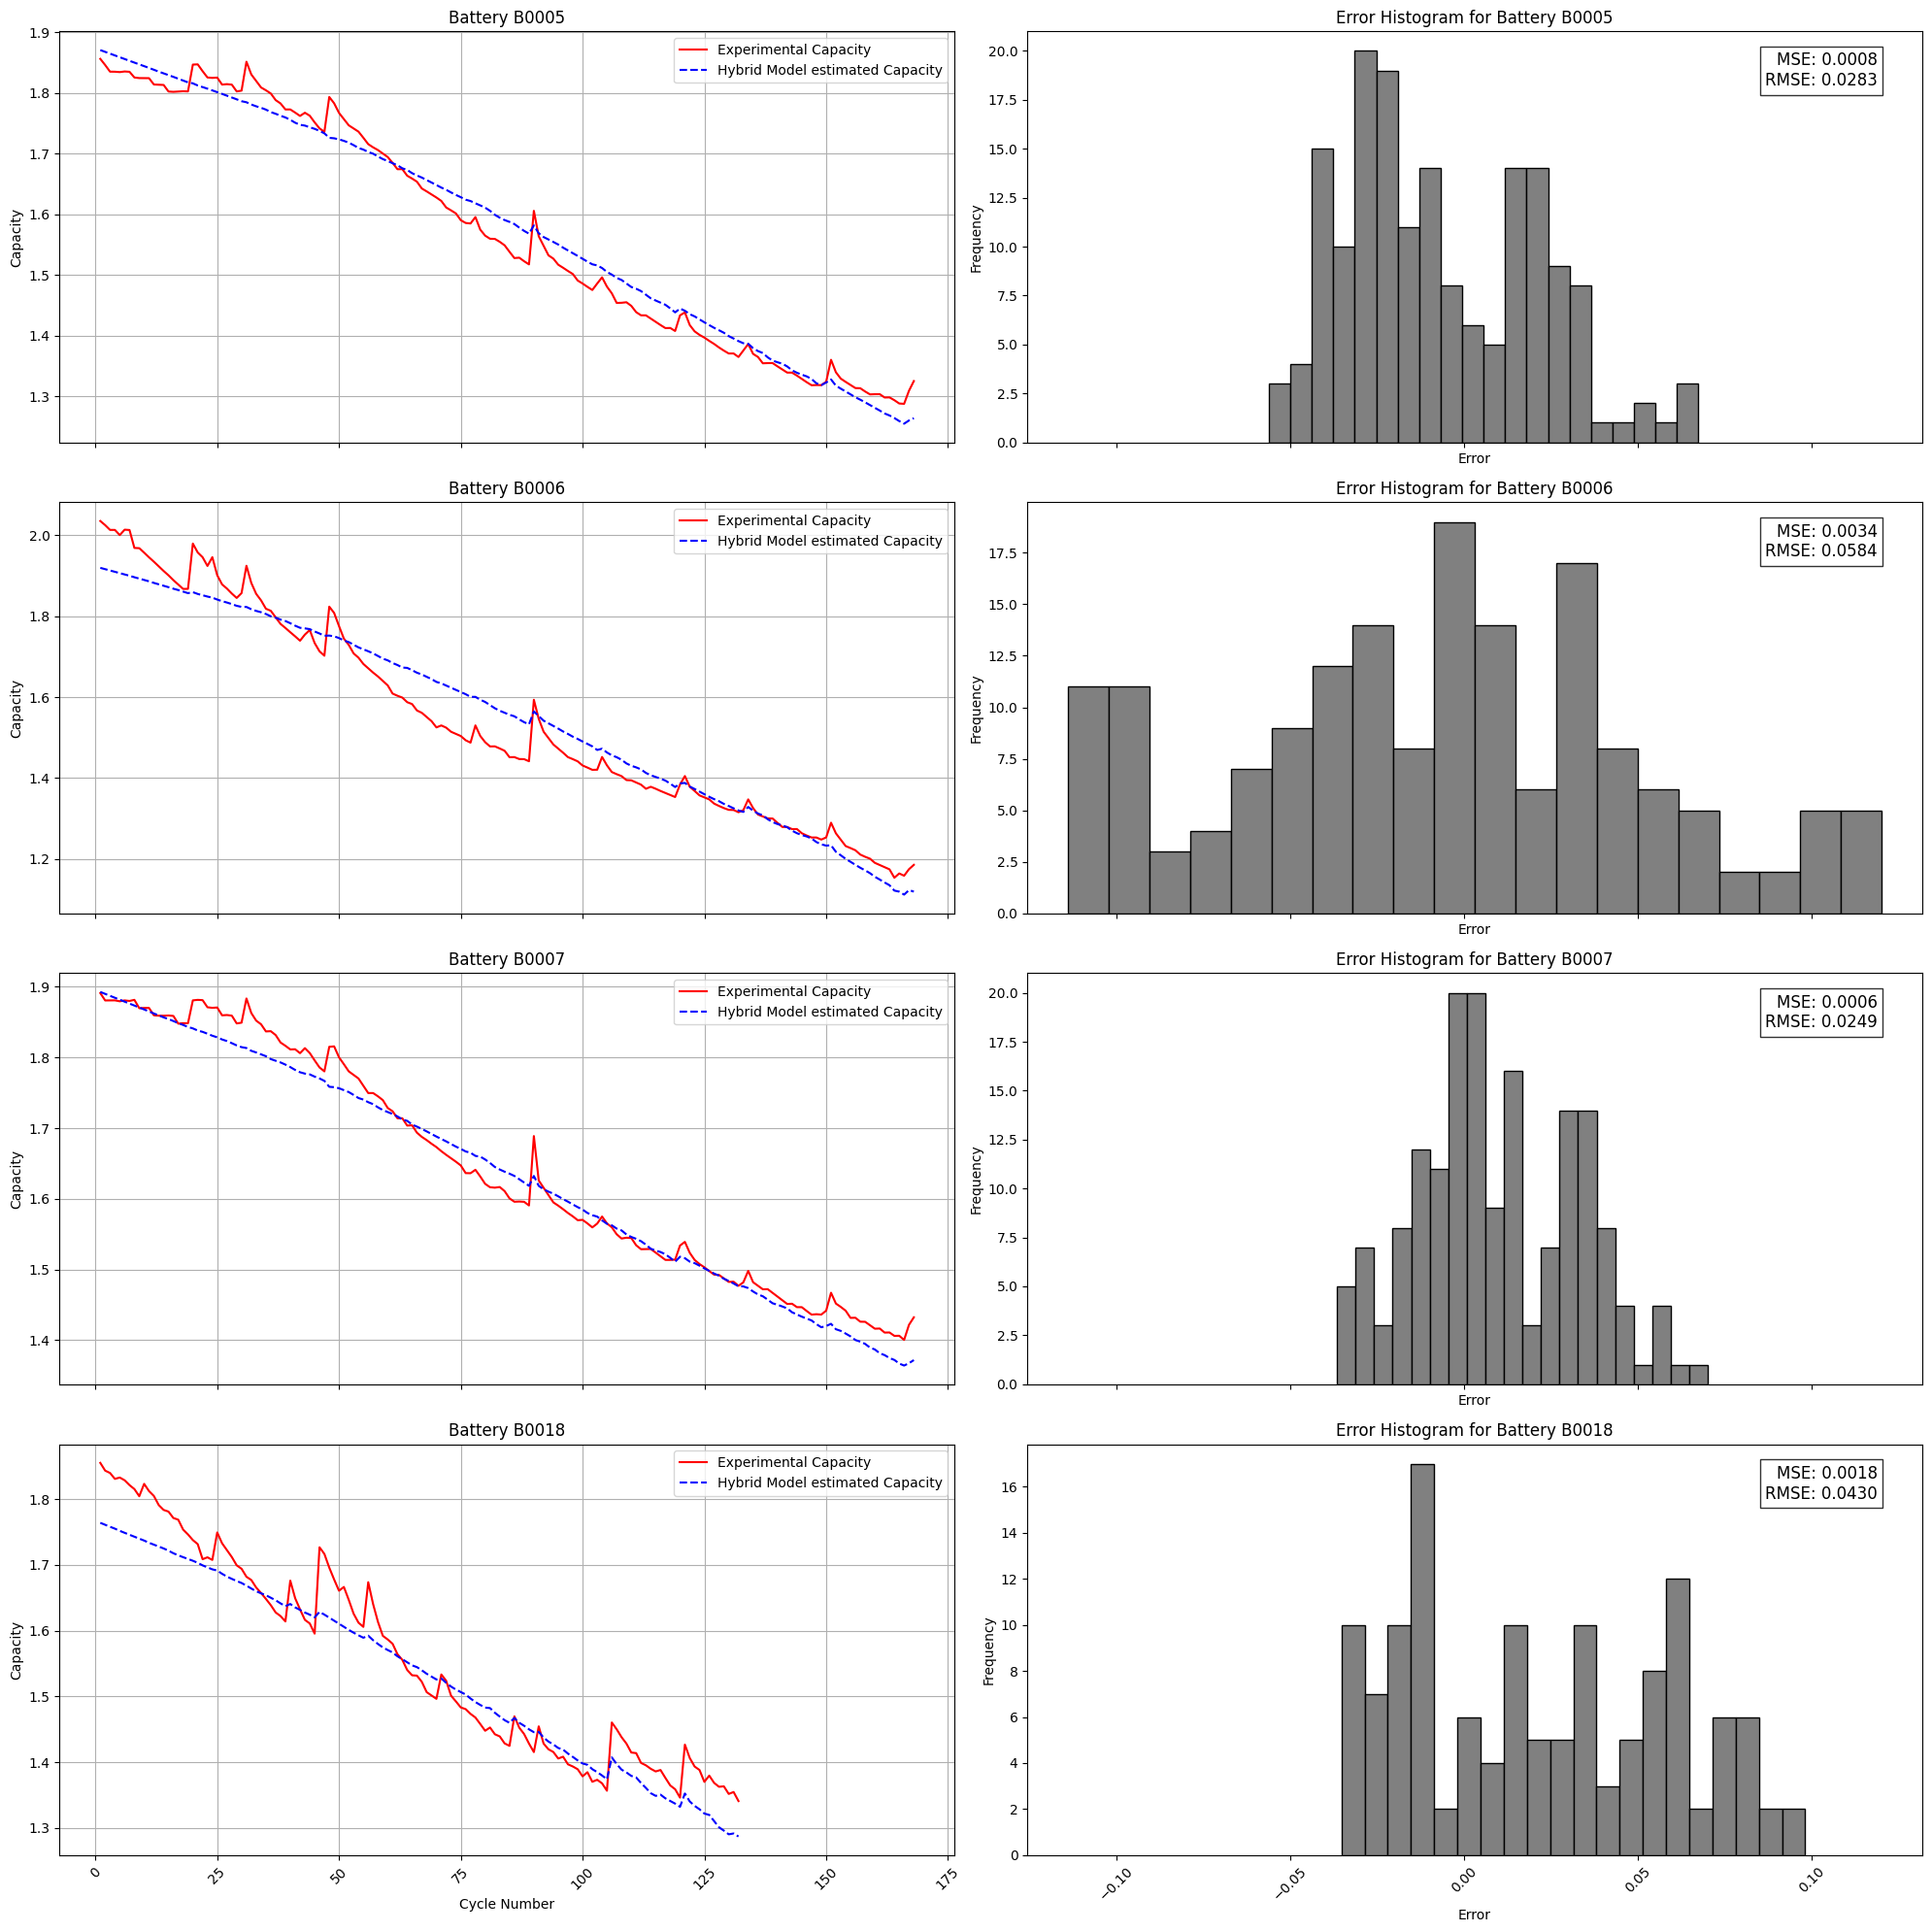

In [ ]:
fig, axes = plt.subplots(len(battery_dfs), 2, figsize=(20, 5 * len(battery_dfs)), sharex='col')

for i, (battery, reorg_t_df) in enumerate(battery_dfs.items()):
    # Drop the 'type' and 'Battery' columns if they exist and ensure all data is float32
    columns_to_drop = ['type', 'Battery']
    reorg_t_df = reorg_t_df.drop(columns=[col for col in columns_to_drop if col in reorg_t_df.columns]).astype(np.float32)
    
    # Calculate predicted capacity using hybrid model
    hybrid_model, reorg_t_df_predict, df_future = train_hybrid_model(reorg_t_df, k=0.13, reference_cycle=min(len(reorg_t_df)-1, 167))
    
    # Display the first few rows of the corrected dataframe
    print(f"Battery {battery} Corrected DataFrame:")
    print(reorg_t_df_predict.head())
    print("\n")
    
    # Plot experimental capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['Capacity'], label='Experimental Capacity', color='red')
    
    # Plot predicted capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['C. Capacity_hybrid'], label='Hybrid Model estimated Capacity', color='blue', linestyle='--')
    
    axes[i, 0].set_title(f'Battery {battery}')
    axes[i, 0].set_ylabel('Capacity')
    axes[i, 0].legend()
    axes[i, 0].grid()
    
    # Rotate x-axis labels for readability
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Calculate error
    error = reorg_t_df_predict['Capacity'] - reorg_t_df_predict['C. Capacity_hybrid']
    
    # Plot error histogram
    axes[i, 1].hist(error, bins=20, color='gray', edgecolor='black')
    axes[i, 1].set_title(f'Error Histogram for Battery {battery}')
    axes[i, 1].set_xlabel('Error')
    axes[i, 1].set_ylabel('Frequency')
    
    # Rotate x-axis labels for readability
    axes[i, 1].tick_params(axis='x', rotation=45)
    
    # Calculate RMSE and MSE
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    
    # Display RMSE and MSE on the histogram
    axes[i, 1].text(0.95, 0.95, f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}', 
                    transform=axes[i, 1].transAxes, fontsize=12,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))

# Set common labels
axes[-1, 0].set_xlabel('Cycle Number')

# Adjust layout
plt.tight_layout()
plt.show()


Epoch 1/100


c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0356 - mae: 0.1678 - val_loss: 0.0050 - val_mae: 0.0656
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - mae: 0.0870 - val_loss: 0.0024 - val_mae: 0.0425
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0033 - val_mae: 0.0523
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0501 - val_loss: 0.0011 - val_mae: 0.0289
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - mae: 0.0291 - val_loss: 8.6612e-04 - val_mae: 0.0233
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 6.2508e-04 - val_mae: 0.0218
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1365e-04 - mae: 0.0264 - val_loss: 9.0504e-04 - val_mae: 0.0267
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.9832e-04 - mae: 0.0261 - val_loss: 5.6157e-04 - val_mae: 0.0191
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8851e-04

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0102 - mae: 0.0834 - val_loss: 0.0055 - val_mae: 0.0621
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0074 - mae: 0.0635 - val_loss: 0.0054 - val_mae: 0.0609
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mae: 0.0892 - val_loss: 0.0053 - val_mae: 0.0606
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mae: 0.0705 - val_loss: 0.0062 - val_mae: 0.0558
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - mae: 0.0683 - val_loss: 0.0054 - val_mae: 0.0632
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - mae: 0.0741 - val_loss: 0.0054 - val_mae: 0.0546
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - mae: 0.0716 - val_loss: 0.0048 - val_mae: 0.0577
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mae: 0.0717 - val_loss: 0.0051 - val_mae: 0.0525
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mae: 0.0634 - val_loss: 0

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030 - mae: 0.0456 - val_loss: 8.8400e-04 - val_mae: 0.0245
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013 - mae: 0.0284 - val_loss: 0.0013 - val_mae: 0.0306
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0290 - val_loss: 7.6825e-04 - val_mae: 0.0229
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4869e-04 - mae: 0.0239 - val_loss: 6.7627e-04 - val_mae: 0.0210
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9673e-04 - mae: 0.0235 - val_loss: 5.0322e-04 - val_mae: 0.0182
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6835e-04 - mae: 0.0196 - val_loss: 4.8682e-04 - val_mae: 0.0180
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2086e-04 - mae: 0.0207 - val_loss: 5.0633e-04 - val_mae: 0.0183
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3533e-04 - mae: 0.0214 - val_loss: 4.8285e-04 - val_mae: 0.0179
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0377 - mae: 0.1751 - val_loss: 0.0028 - val_mae: 0.0403
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0075 - val_mae: 0.0746
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mae: 0.0612 - val_loss: 0.0018 - val_mae: 0.0361
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0028 - mae: 0.0441 - val_loss: 0.0045 - val_mae: 0.0583
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mae: 0.0532 - val_loss: 0.0018 - val_mae: 0.0358
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - mae: 0.0398 - val_loss: 0.0026 - val_mae: 0.0391
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - mae: 0.0429 - val_loss: 0.0018 - val_mae: 0.0353
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - mae: 0.0401 - val_loss: 0.0023 - val_mae: 0.0408
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 0.0436 - val_loss: 0

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mae: 0.0962 - val_loss: 0.0085 - val_mae: 0.0871
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - mae: 0.0649 - val_loss: 0.0011 - val_mae: 0.0252
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0278 - val_loss: 0.0012 - val_mae: 0.0288
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 - mae: 0.0322 - val_loss: 0.0020 - val_mae: 0.0363
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - mae: 0.0248 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1456e-04 - mae: 0.0241 - val_loss: 8.0510e-04 - val_mae: 0.0243
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010 - mae: 0.0278 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8986e-04 - mae: 0.0233 - val_loss: 8.7432e-04 - val_mae: 0.0246
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4962e-04 - mae: 

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1866 - mae: 0.4099 - val_loss: 0.0077 - val_mae: 0.0817
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mae: 0.0750 - val_loss: 0.0255 - val_mae: 0.1359
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - mae: 0.1381 - val_loss: 0.0097 - val_mae: 0.0636
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mae: 0.0663 - val_loss: 0.0077 - val_mae: 0.0815
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - mae: 0.0894 - val_loss: 0.0087 - val_mae: 0.0872
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mae: 0.0850 - val_loss: 0.0052 - val_mae: 0.0582
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 - mae: 0.0657 - val_loss: 0.0056 - val_mae: 0.0530
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mae: 0.0617 - val_loss: 0.0052 - val_mae: 0.0596
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - mae: 0.0672 - val_loss: 0

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0356 - mae: 0.1691 - val_loss: 0.0054 - val_mae: 0.0690
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 - mae: 0.0902 - val_loss: 0.0037 - val_mae: 0.0559
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - mae: 0.0413 - val_loss: 0.0027 - val_mae: 0.0473
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 - mae: 0.0447 - val_loss: 8.8866e-04 - val_mae: 0.0237
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4059e-04 - mae: 0.0239 - val_loss: 0.0012 - val_mae: 0.0291
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - mae: 0.0283 - val_loss: 5.1707e-04 - val_mae: 0.0188
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3279e-04 - mae: 0.0205 - val_loss: 6.6321e-04 - val_mae: 0.0200
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2933e-04 - mae: 0.0202 - val_loss: 5.2178e-04 - val_mae: 0.0193
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8704

c:\Users\James\anaconda3\envs\new_science_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0392 - mae: 0.1802 - val_loss: 0.0019 - val_mae: 0.0350
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mae: 0.0679 - val_loss: 0.0071 - val_mae: 0.0757
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mae: 0.0741 - val_loss: 0.0013 - val_mae: 0.0292
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0417 - val_loss: 0.0033 - val_mae: 0.0508
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 - mae: 0.0484 - val_loss: 0.0013 - val_mae: 0.0290
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - mae: 0.0390 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0404 - val_loss: 0.0012 - val_mae: 0.0275
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0378 - val_loss: 0.0015 - val_mae: 0.0317
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - mae: 0.0401 - val_loss: 0

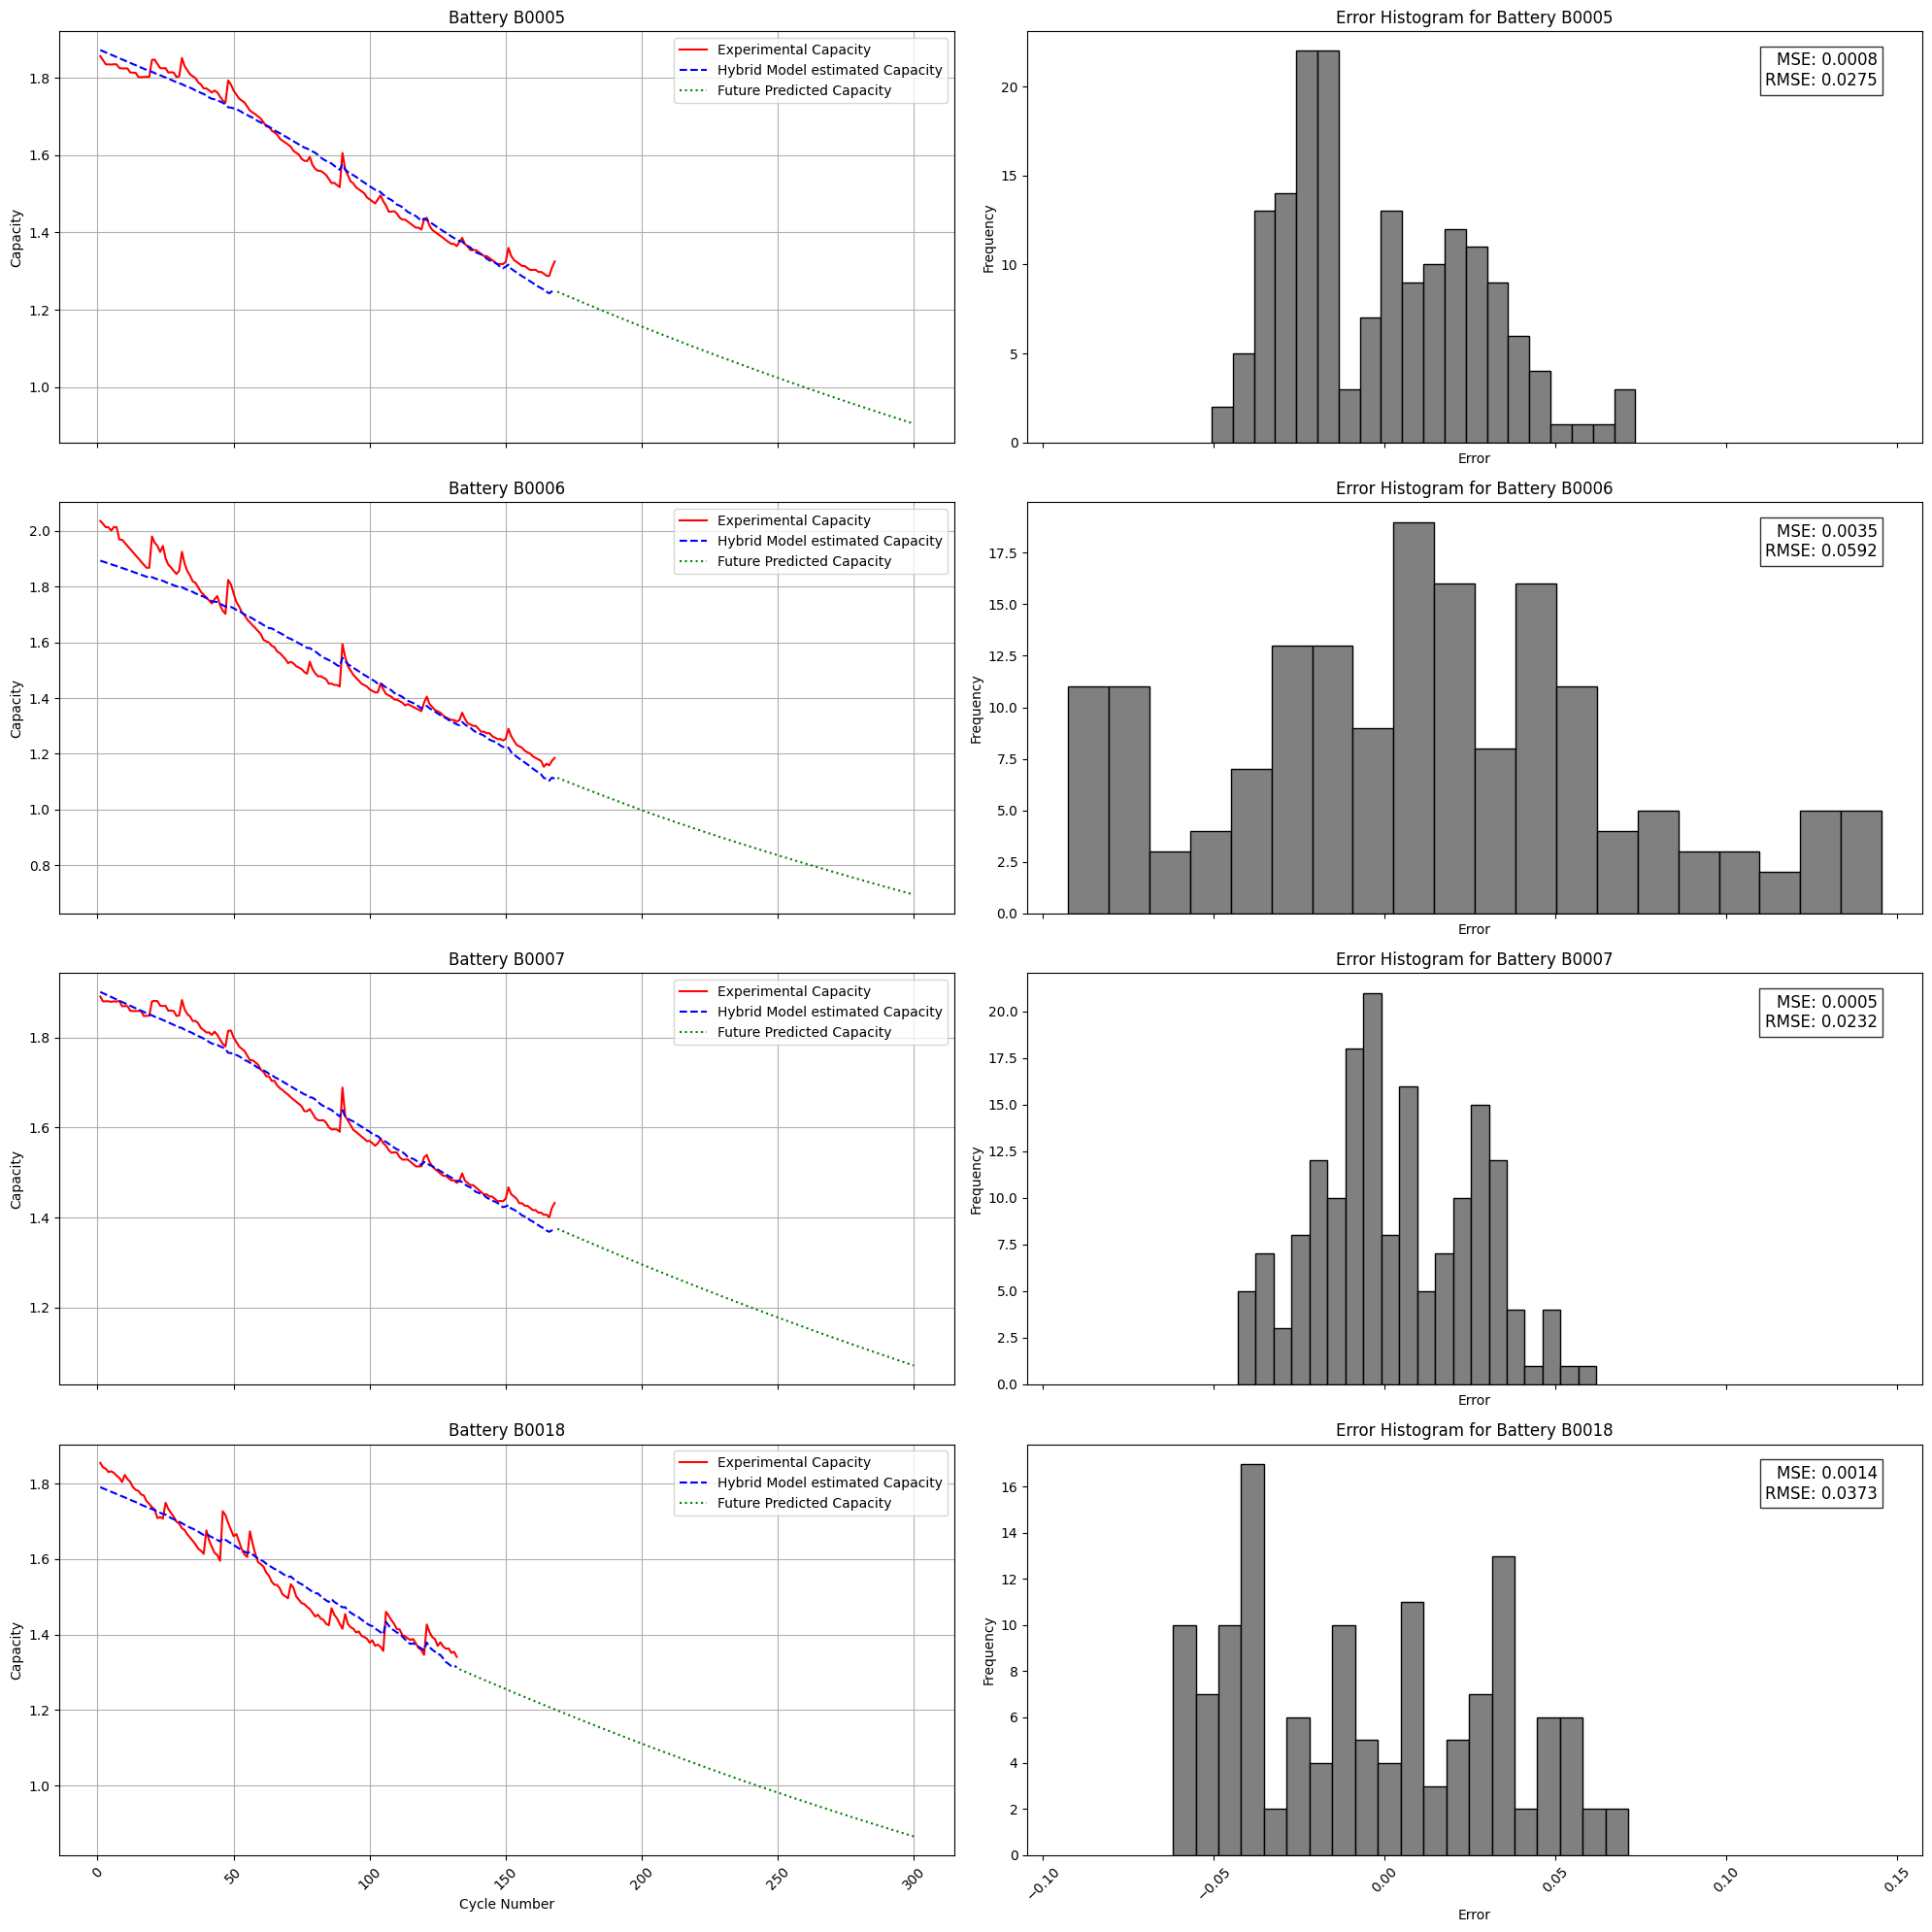

In [59]:
# Define the function to predict future capacity until 300 cycles for all batteries
def predict_future_capacity(battery_dfs, future_cycles=300):
    future_predictions = {}

    for battery, df in battery_dfs.items():
        # Drop unnecessary columns and ensure all data is float32
        columns_to_drop = ['type', 'Battery']
        df = df.drop(columns=[col for col in columns_to_drop if col in df.columns]).astype(np.float32)
        
        # Get the last id_cycle of the experimental data
        last_id_cycle = df['id_cycle'].max()
        
        # Calculate predicted capacity using hybrid model
        hybrid_model, df_predict, df_future = train_hybrid_model(df, k=0.13, reference_cycle=min(len(df)-1, 167), future_start=last_id_cycle + 1, future_end=future_cycles)
        
        # Store the future predictions
        future_predictions[battery] = df_future

    return future_predictions

# Predict future capacity until 300 cycles for all batteries
future_predictions = predict_future_capacity(battery_dfs, future_cycles=300)

# Plot the full historical data with the predicted future data for all batteries
fig, axes = plt.subplots(len(battery_dfs), 2, figsize=(20, 5 * len(battery_dfs)), sharex='col')

for i, (battery, reorg_t_df) in enumerate(battery_dfs.items()):
    # Drop unnecessary columns and ensure all data is float32
    columns_to_drop = ['type', 'Battery']
    reorg_t_df = reorg_t_df.drop(columns=[col for col in columns_to_drop if col in reorg_t_df.columns]).astype(np.float32)
    
    # Calculate predicted capacity using hybrid model
    hybrid_model, reorg_t_df_predict, df_future = train_hybrid_model(reorg_t_df, k=0.13, reference_cycle=min(len(reorg_t_df)-1, 167))
    
    # Display the first few rows of the corrected dataframe
    print(f"Battery {battery} Corrected DataFrame:")
    print(reorg_t_df_predict.head())
    print("\n")
    
    # Plot experimental capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['Capacity'], label='Experimental Capacity', color='red')
    
    # Plot predicted capacity
    axes[i, 0].plot(reorg_t_df_predict['id_cycle'], reorg_t_df_predict['C. Capacity_hybrid'], label='Hybrid Model estimated Capacity', color='blue', linestyle='--')
    
    # Plot future predictions
    df_future = future_predictions[battery]
    axes[i, 0].plot(df_future['cycle'], df_future['C. Capacity_hybrid'], label='Future Predicted Capacity', color='green', linestyle=':')
    
    axes[i, 0].set_title(f'Battery {battery}')
    axes[i, 0].set_ylabel('Capacity')
    axes[i, 0].legend()
    axes[i, 0].grid()
    
    # Rotate x-axis labels for readability
    axes[i, 0].tick_params(axis='x', rotation=45)
    
    # Calculate error
    error = reorg_t_df_predict['Capacity'] - reorg_t_df_predict['C. Capacity_hybrid']
    
    # Plot error histogram
    axes[i, 1].hist(error, bins=20, color='gray', edgecolor='black')
    axes[i, 1].set_title(f'Error Histogram for Battery {battery}')
    axes[i, 1].set_xlabel('Error')
    axes[i, 1].set_ylabel('Frequency')
    
    # Rotate x-axis labels for readability
    axes[i, 1].tick_params(axis='x', rotation=45)
    
    # Calculate RMSE and MSE
    mse = np.mean(error**2)
    rmse = np.sqrt(mse)
    
    # Display RMSE and MSE on the histogram
    axes[i, 1].text(0.95, 0.95, f'MSE: {mse:.4f}\nRMSE: {rmse:.4f}', 
                    transform=axes[i, 1].transAxes, fontsize=12,
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))

# Set common labels
axes[-1, 0].set_xlabel('Cycle Number')

# Adjust layout
plt.tight_layout()
plt.show()

Other Neural network can be tried, LSTM, RNN, ARIMA or ANN+LSTM